In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
ds_ncs = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/NCS.csv', sep=',')
ds_ncs = pd.DataFrame(ds_ncs)

ds_pw_cdom = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/PW_CDOM.csv', sep=',')
ds_pw_cdom = pd.DataFrame(ds_pw_cdom)

ds_wc_cdom = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/WC_CDOM.csv', sep=',')
ds_pw_cdom = pd.DataFrame(ds_pw_cdom)

ds_pw_fedoc = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/PW_Fe_DOC.csv', sep=',')
ds_pw_fedoc = pd.DataFrame(ds_pw_fedoc)

ds_wc_fedoc = pd.read_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/WC_Fe_DOC.csv', sep=',')
ds_wc_fedoc = pd.DataFrame(ds_wc_fedoc)

ds_wc = pd.concat([ds_wc_fedoc, ds_wc_cdom], keys=['TYPE', 'STN', 'Date', 'RGN', 'Depth'])
ds_wc = ds_wc.reset_index(drop=True)

ds_pw = pd.merge(ds_pw_fedoc, ds_pw_cdom, how="outer", on=['TYPE', 'STN', 'Date', 'RGN'])
ds_pw = pd.merge(ds_pw, ds_ncs, how="outer", on=['TYPE', 'STN', 'Date', 'RGN'])

ds_wc = pd.merge(ds_wc_cdom, ds_wc_fedoc, how="outer", on=['TYPE', 'STN', 'Date', 'RGN', 'DEPTH'])

ds_pw['DEPTH'] = 'X'
dspw = ds_pw.drop("TYPE", axis=1)
dswc = ds_wc.drop("TYPE", axis=1)

ds = pd.concat([dswc, dspw], axis = 0)

dspw.to_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/SUM_pw.csv', index=False, header=True)
dswc.to_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/SUM_wc.csv', index=False, header=True)
ds.to_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/SUM.csv', index=False, header=True)


In [3]:
dspw['Date'] = pd.to_datetime(dspw['Date'], format="%m/%d/%Y")
dspw['YearMonth'] = dspw['Date'].dt.to_period('M')

dswc['Date'] = pd.to_datetime(dswc['Date'], format="%m/%d/%Y")
dswc['YearMonth'] = dswc['Date'].dt.to_period('M')

ds['Date'] = pd.to_datetime(ds['Date'], format="%m/%d/%Y")
ds['YearMonth'] = ds['Date'].dt.to_period('M')

In [4]:
# Group by RGN and STN, then calculate the mean of FeT_uM
dspw_grouped = dspw.groupby(['RGN', 'STN', 'YearMonth'])[['FeT_uM', 'DOC_uM', 'acdom_440', 'OS%', 'TC%']].mean().reset_index()

dspw_grouped['FeT_uM_PW'] = dspw_grouped['FeT_uM']
dspw_grouped = dspw_grouped.drop("FeT_uM", axis=1)

dspw_grouped['acdom_440_PW'] = dspw_grouped['acdom_440']
dspw_grouped = dspw_grouped.drop("acdom_440", axis=1)

dspw_grouped['DOC_uM_PW'] = dspw_grouped['DOC_uM']
dspw_grouped = dspw_grouped.drop("DOC_uM", axis=1)

dspw_grouped['OS'] = dspw_grouped['OS%']
dspw_grouped = dspw_grouped.drop("OS%", axis=1)

dspw_grouped['TC'] = dspw_grouped['TC%']
dspw_grouped = dspw_grouped.drop("TC%", axis=1)

dspw_grouped

,RGN,STN,YearMonth,FeT_uM_PW,acdom_440_PW,DOC_uM_PW,OS,TC
0,Central,B_point,2022-06,0.245085,0.801597,545.547579,NaN,NaN
1,Central,S_beach,2022-05,1.419038,-0.515319,503.198583,NaN,NaN
2,Central,TC,2022-11,NaN,44.622098,5961.562500,NaN,NaN
3,Central,TC,2023-07,29.097216,NaN,NaN,0.538169,6.418749
4,Central,VB,2022-11,NaN,1.955034,822.500000,NaN,NaN
5,Central,VB,2023-07,13.657505,1.290650,NaN,NaN,1.846124
6,North,BR2,2023-07,0.795076,NaN,NaN,NaN,0.469871
7,North,SP,2023-01,NaN,1.959916,1516.188079,NaN,NaN
8,North,TV,2023-07,2.560315,NaN,NaN,0.042462,0.954877
9,Offshore,DAY-OFF,2023-09,2.864086,NaN,NaN,NaN,6.516781


In [5]:
# Group by RGN and STN, then calculate the mean of FeT_uM
dswc_grouped = dswc.groupby(['RGN', 'STN', 'YearMonth', 'DEPTH'])[['FeT_uM', 'DOC_uM', 'acdom_440']].mean().reset_index()

dswc_grouped['FeT_uM_WC'] = dswc_grouped['FeT_uM']
dswc_grouped = dswc_grouped.drop("FeT_uM", axis=1)

dswc_grouped['acdom_440_WC'] = dswc_grouped['acdom_440']
dswc_grouped = dswc_grouped.drop("acdom_440", axis=1)

dswc_grouped['DOC_uM_WC'] = dswc_grouped['DOC_uM']
dswc_grouped = dswc_grouped.drop("DOC_uM", axis=1)

dswc_grouped

,RGN,STN,YearMonth,DEPTH,FeT_uM_WC,acdom_440_WC,DOC_uM_WC
0,Central,B_point,2022-06,B,0.120128,1.430193,291.708333
1,Central,B_point,2022-06,S,0.089385,1.580384,285.625000
2,Central,S_beach,2022-05,B,0.663319,0.058024,154.708333
3,Central,S_beach,2022-05,S,0.453166,0.194146,325.625000
4,Central,TC,2022-11,S,1.322752,2.910127,821.833333
...,...,...,...,...,...,...,...
84,St.Lucie,SF,2023-07,B,NaN,1.002675,NaN
85,St.Lucie,SF,2023-07,S,0.744371,0.969779,NaN
86,St.Lucie,SF2,2023-07,B,4.636370,0.026236,NaN
87,St.Lucie,SF2,2023-07,S,2.668041,1.212531,NaN


In [6]:
ds_avg = pd.merge(dswc_grouped, dspw_grouped, how="outer", on=['RGN', 'STN', 'YearMonth'])

ds_avg.to_csv('../Fellowships/IRL_GRF/Jordon_Project/Coro_data/SUM_avg.csv', index=False, header=True)

ds_avg

,RGN,STN,YearMonth,DEPTH,FeT_uM_WC,acdom_440_WC,DOC_uM_WC,FeT_uM_PW,acdom_440_PW,DOC_uM_PW,OS,TC
0,Central,B_point,2022-06,B,0.120128,1.430193,291.708333,0.245085,0.801597,545.547579,NaN,NaN
1,Central,B_point,2022-06,S,0.089385,1.580384,285.625000,0.245085,0.801597,545.547579,NaN,NaN
2,Central,S_beach,2022-05,B,0.663319,0.058024,154.708333,1.419038,-0.515319,503.198583,NaN,NaN
3,Central,S_beach,2022-05,S,0.453166,0.194146,325.625000,1.419038,-0.515319,503.198583,NaN,NaN
4,Central,TC,2022-11,S,1.322752,2.910127,821.833333,NaN,44.622098,5961.562500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88,St.Lucie,SLE,2022-11,S,0.698067,2.537821,631.125000,NaN,2.519969,625.750000,NaN,NaN
89,St.Lucie,SF,2023-10,NaN,NaN,NaN,NaN,52.441177,17.963400,NaN,1.402728,11.031834
90,St.Lucie,SF-1.1,2023-10,NaN,NaN,NaN,NaN,27.902264,10.363500,NaN,1.289014,11.623375
91,St.Lucie,SF-1.2,2023-10,NaN,NaN,NaN,NaN,5.214612,9.212000,NaN,NaN,1.180073


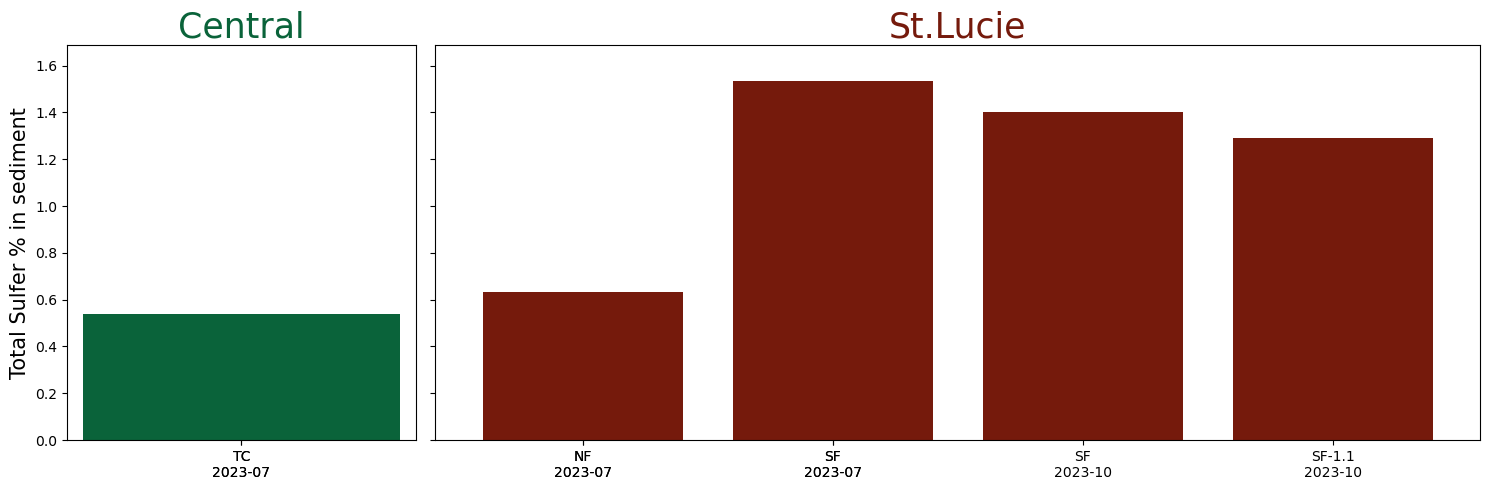

In [7]:
choice = 'OS'
name = f'Total Sulfer % in sediment'

rgn_order = [ 'Central', 'St.Lucie']
colors = ['#0a633a', '#751a0c']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [(C_width/width)*15, (S_width/width)*15]})

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes[i]

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Bar_Sulfur.png', format='png', transparent=True)
plt.show()

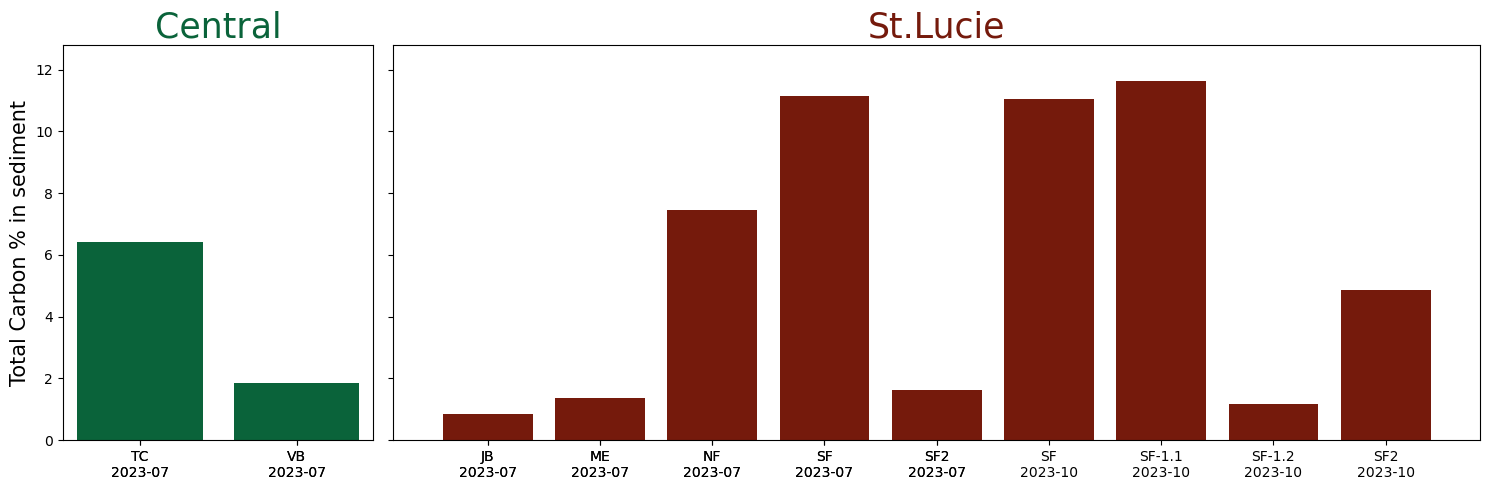

In [8]:
choice = 'TC'
name = f'Total Carbon % in sediment'

rgn_order = [ 'Central', 'St.Lucie']
colors = ['#0a633a', '#751a0c']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [(C_width/width)*15, (S_width/width)*15]})

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes[i]

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Bar_Carbon.png', format='png', transparent=True)
plt.show()

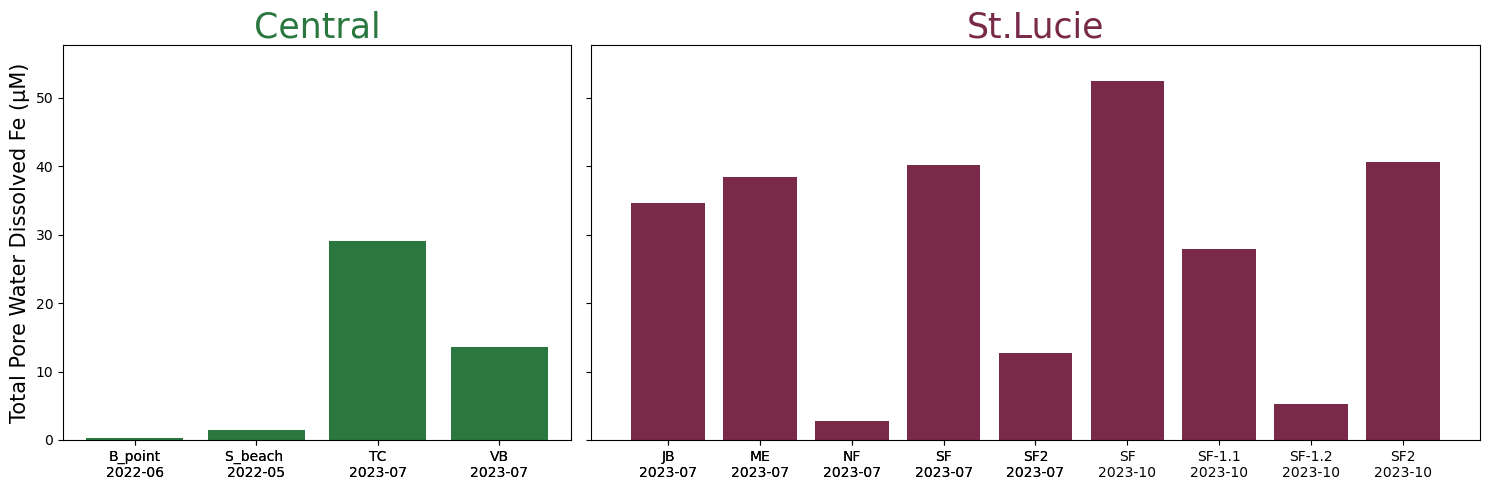

In [9]:
choice = 'FeT_uM_PW'
name = f'Total Pore Water Dissolved Fe (µM)'

rgn_order = [ 'Central', 'St.Lucie']
colors = ['#2a783f', '#782a48']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [(C_width/width)*15, (S_width/width)*15]})

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes[i]

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Bar_pw_Fe.png', format='png', transparent=True)
plt.show()

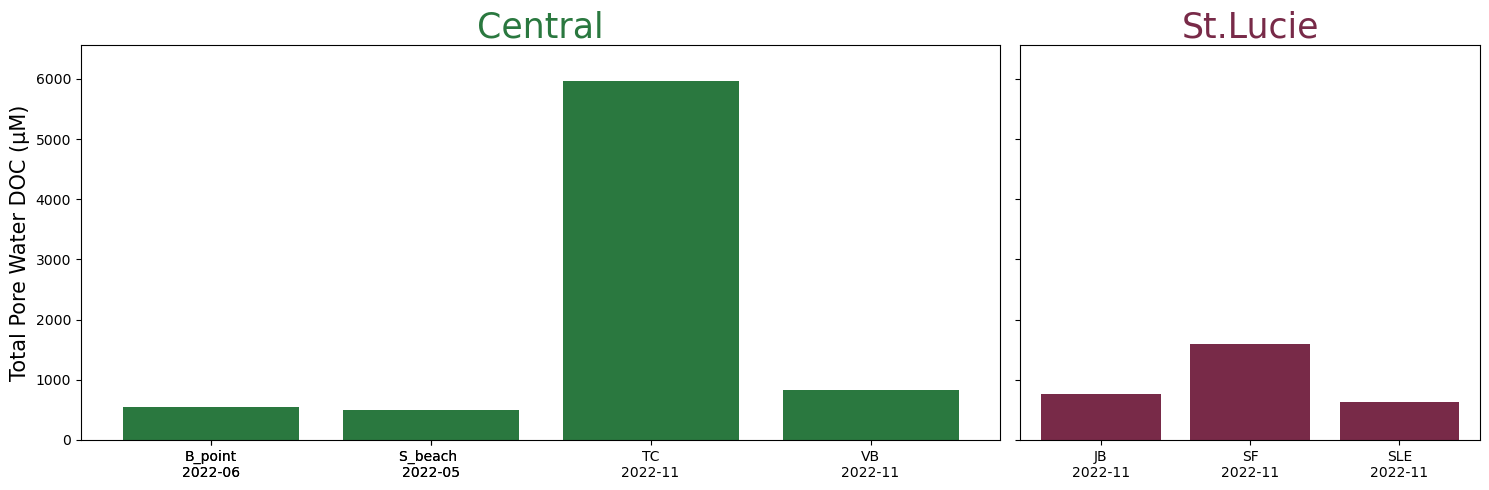

In [10]:
choice = 'DOC_uM_PW'
name = f'Total Pore Water DOC (µM)'

rgn_order = [ 'Central', 'St.Lucie']
colors = ['#2a783f', '#782a48']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [(C_width/width)*15, (S_width/width)*15]})

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes[i]

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Bar_pw_DOC.png', format='png', transparent=True)
plt.show()

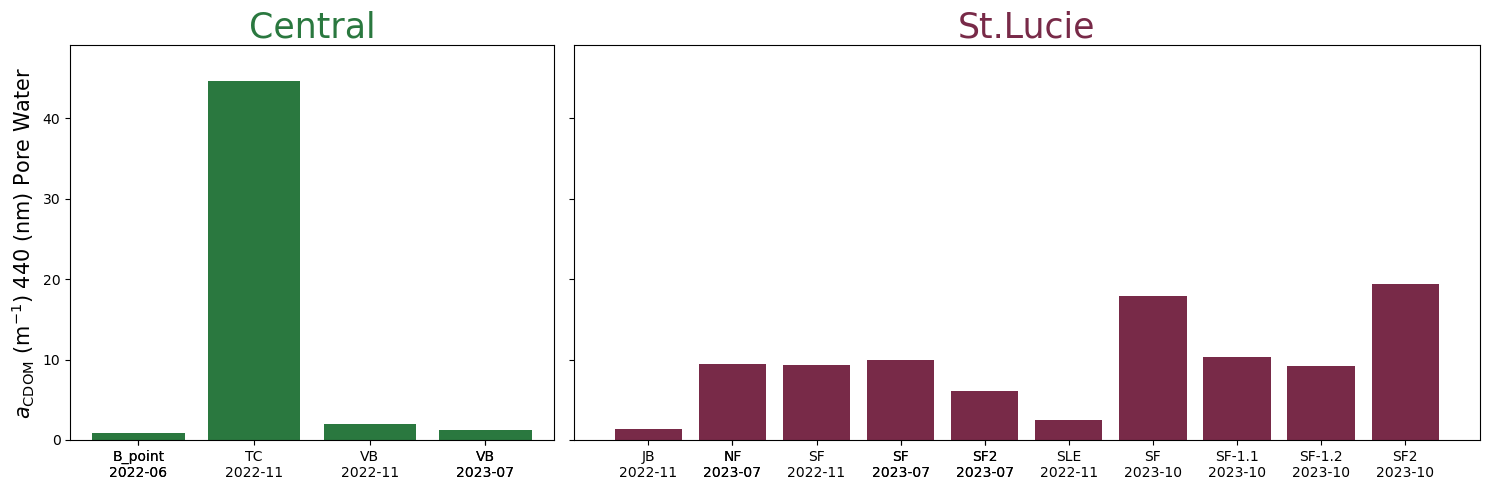

In [11]:
choice = 'acdom_440_PW'
name = r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Pore Water'

rgn_order = [ 'Central', 'St.Lucie']
colors = ['#2a783f', '#782a48']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = C_width + S_width

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, gridspec_kw={'width_ratios': [(C_width/width)*15, (S_width/width)*15]})

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) 

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    
    ax = axes[i]

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{d}' for s, d in zip(stn, date)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Bar_pw_CDOM.png', format='png', transparent=True)
plt.show()

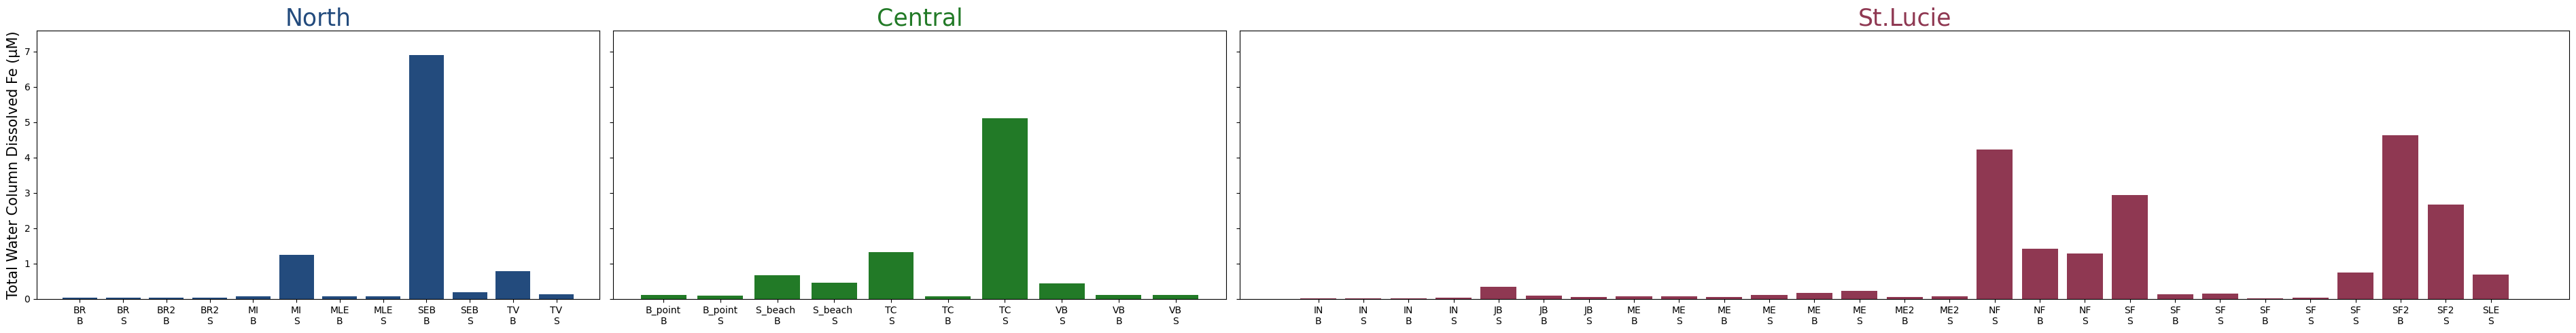

In [12]:
choice = 'FeT_uM_WC'
name = f'Total Water Column Dissolved Fe (µM)'

rgn_order = ['North', 'Central', 'St.Lucie']

colors = ['#234b7d', '#227a27', '#8f3852']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = N_width + C_width + S_width 

fig, axes = plt.subplots(1, 3, figsize=(38, 5), sharey=True, gridspec_kw={'width_ratios': [((N_width-1)/width)*38, ((C_width+2)/width)*38, ((S_width-1)/width)*38]})

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) + '_' + sub_df['DEPTH']

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    dep = sub_df['DEPTH']
    
    ax = axes[i]

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{x}' for s, x in zip(stn, dep)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Bar_wc_Fe.png', format='png', transparent=True)
plt.show()

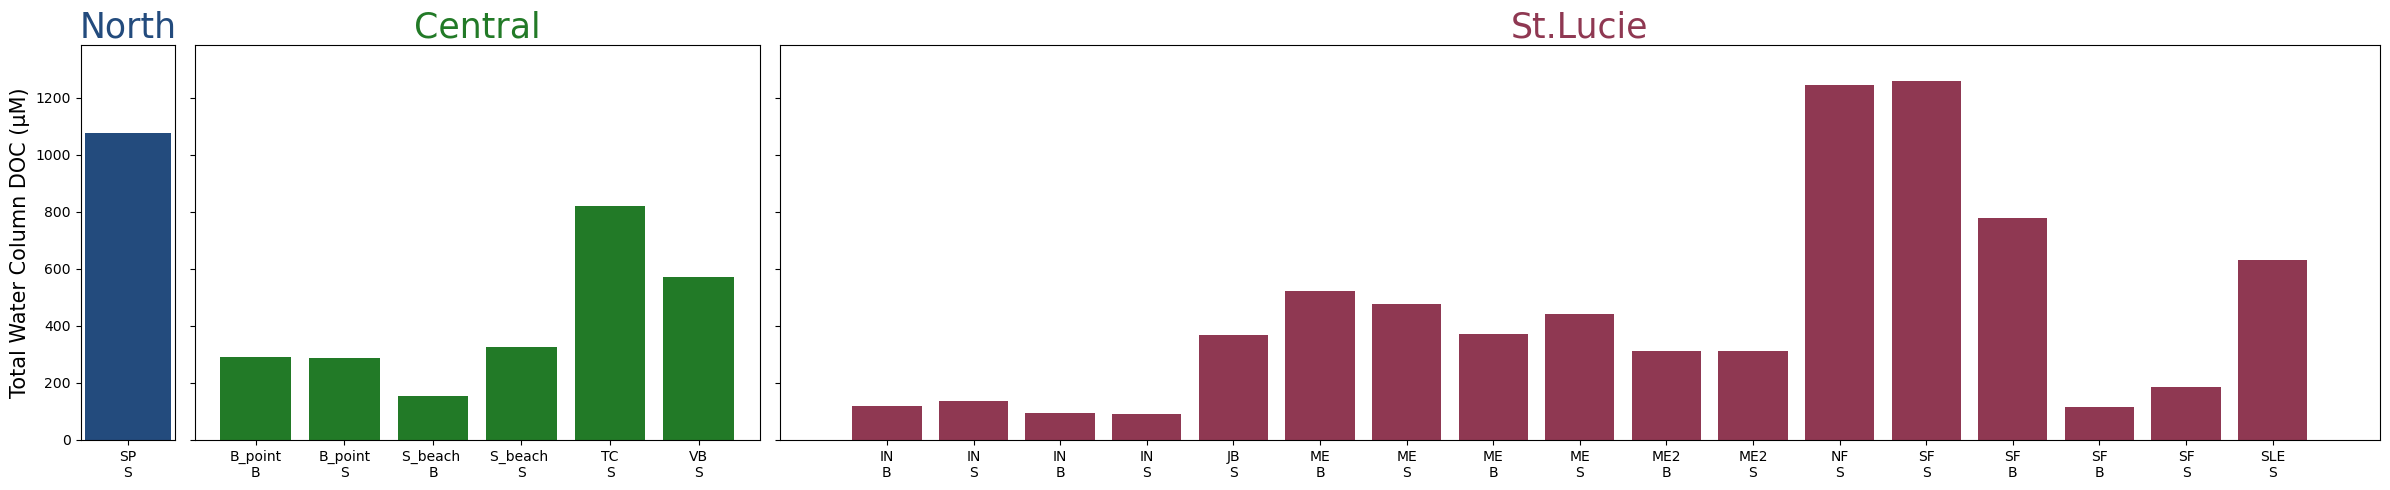

24


In [13]:
choice = 'DOC_uM_WC'
name = f'Total Water Column DOC (µM)'

rgn_order = ['North', 'Central', 'St.Lucie']

colors = ['#234b7d', '#227a27', '#8f3852']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = N_width + C_width + S_width 

fig, axes = plt.subplots(1, 3, figsize=(width, 5), sharey=True, gridspec_kw={'width_ratios': [N_width, C_width, S_width]})

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) + '_' + sub_df['DEPTH']

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    dep = sub_df['DEPTH']
    
    ax = axes[i]

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{x}' for s, x in zip(stn, dep)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Bar_wc_DOC.png', format='png', transparent=True)
plt.show()
print(width)

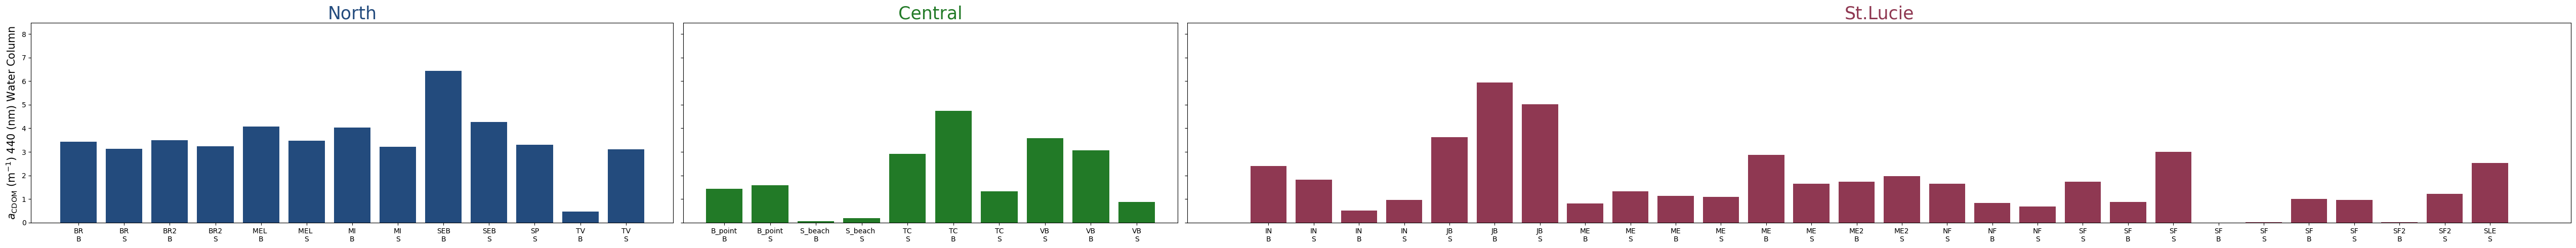

51


In [14]:
choice = 'acdom_440_WC'
name = r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column'

rgn_order = ['North', 'Central', 'St.Lucie']

colors = ['#234b7d', '#227a27', '#8f3852']

N_width = len(ds_avg[ (ds_avg['RGN'] == 'North') & ds_avg[choice] > 0])
C_width = len(ds_avg[ (ds_avg['RGN'] == 'Central') & ds_avg[choice] > 0])
S_width = len(ds_avg[ (ds_avg['RGN'] == 'St.Lucie') & ds_avg[choice] > 0])
width = N_width + C_width + S_width 

fig, axes = plt.subplots(1, 3, figsize=(width, 5), sharey=True, gridspec_kw={'width_ratios': [N_width, C_width, S_width]})

for i, rgn_value in enumerate(rgn_order):
    sub_df = ds_avg[ds_avg['RGN'] == rgn_value]
    sub_df = sub_df[sub_df[choice] > 0]
    sub_df['code'] = sub_df['STN'] + '_' + sub_df['YearMonth'].astype(str) + '_' + sub_df['DEPTH']

    val = sub_df[choice]
    stn = sub_df['STN']
    date = sub_df['YearMonth']
    code = sub_df['code']
    dep = sub_df['DEPTH']
    
    ax = axes[i]

    ax.bar(code, val, color=colors[i])
    
    ax.set_xticks(code)
    ax.set_xticklabels([f'{s}\n{x}' for s, x in zip(stn, dep)], rotation=0, ha='center', size=10)
    
    if i == 0: 
        ax.set_ylabel(name, size=15)

    ax.set_title(f'{rgn_value}', color = colors[i], size=25)

    ax.set_ylim(0, ds_avg[choice].max() * 1.1)

plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Bar_wc_CDOM.png', format='png', transparent=True)
plt.show()
print(width)


In [15]:
ds_avg['RGN'].unique()

array(['Central', 'ECA', 'North', 'Offshore', 'St.Lucie'], dtype=object)

FeT_uM_WC vs acdom_440_WC North: 0.40248125110315713
FeT_uM_WC vs acdom_440_WC Central: 0.024803458491333252
FeT_uM_WC vs acdom_440_WC St.Lucie: 0.049698683856780446
FeT_uM_WC vs acdom_440_WC ECA: 0.13516100775857176
na
DOC_uM_WC vs acdom_440_WC North: -inf
DOC_uM_WC vs acdom_440_WC Central: 0.6517237697226028
DOC_uM_WC vs acdom_440_WC St.Lucie: 0.037036952288465375
DOC_uM_WC vs acdom_440_WC ECA: 0.2091048444131154
na
na
DOC_uM_WC vs FeT_uM_WC Central: 0.49171723288514224
DOC_uM_WC vs FeT_uM_WC St.Lucie: 0.7327064004898574
DOC_uM_WC vs FeT_uM_WC ECA: 0.07588871945181908
na


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\3211210117.py:48: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\3211210117.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)


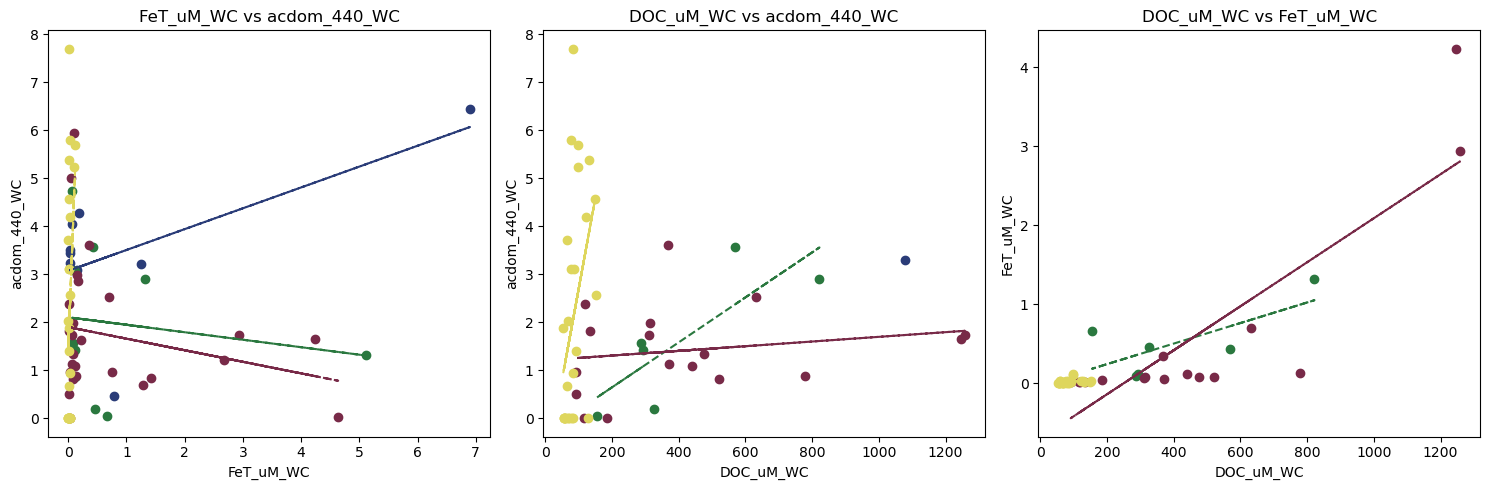

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df = ds_avg[ds_avg['RGN'].isin(['North', 'Central', 'St.Lucie', 'ECA', 'Offshore'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

Frames = []

ax = axes[0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['FeT_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['FeT_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"FeT_uM_WC vs acdom_440_WC {region}: {r_squared}")
        dict = {'mes_x':['FeT_uM_WC'],
                'mes_y':['acdom_440_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('FeT_uM_WC')
ax.set_ylabel('acdom_440_WC')
ax.set_title('FeT_uM_WC vs acdom_440_WC')

ax = axes[1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot) 
        print(f"DOC_uM_WC vs acdom_440_WC {region}: {r_squared}")
        dict = {'mes_x':['DOC_uM_WC'],
                'mes_y':['acdom_440_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')


ax.set_xlabel('DOC_uM_WC')
ax.set_ylabel('acdom_440_WC')
ax.set_title('DOC_uM_WC vs acdom_440_WC')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"

ax = axes[2]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['FeT_uM_WC'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['FeT_uM_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"DOC_uM_WC vs FeT_uM_WC {region}: {r_squared}")
        dict = {'mes_x':['DOC_uM_WC'],
                'mes_y':['FeT_uM_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('DOC_uM_WC')
ax.set_ylabel('FeT_uM_WC')
ax.set_title('DOC_uM_WC vs FeT_uM_WC')


# Show the plot
plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_WC.png', format='png', transparent=True)
plt.show()

r2_sums_1 = pd.concat(Frames, axis=0, ignore_index=False)

In [17]:
df.columns

Index(['RGN', 'STN', 'YearMonth', 'DEPTH', 'FeT_uM_WC', 'acdom_440_WC',
       'DOC_uM_WC', 'FeT_uM_PW', 'acdom_440_PW', 'DOC_uM_PW', 'OS', 'TC'],
      dtype='object')

FeT_uM_WC vs acdom_440_WC North: 0.40248125110315713
FeT_uM_WC vs acdom_440_WC Central: 0.024803458491333252
FeT_uM_WC vs acdom_440_WC St.Lucie: 0.049698683856780446
na
na
DOC_uM_WC vs acdom_440_WC North: -inf
DOC_uM_WC vs acdom_440_WC Central: 0.6517237697226028
DOC_uM_WC vs acdom_440_WC St.Lucie: 0.037036952288465375
na
na
na
DOC_uM_WC vs FeT_uM_WC Central: 0.49171723288514224
DOC_uM_WC vs FeT_uM_WC St.Lucie: 0.7327064004898574
na
na


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\2282102652.py:48: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\2282102652.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)


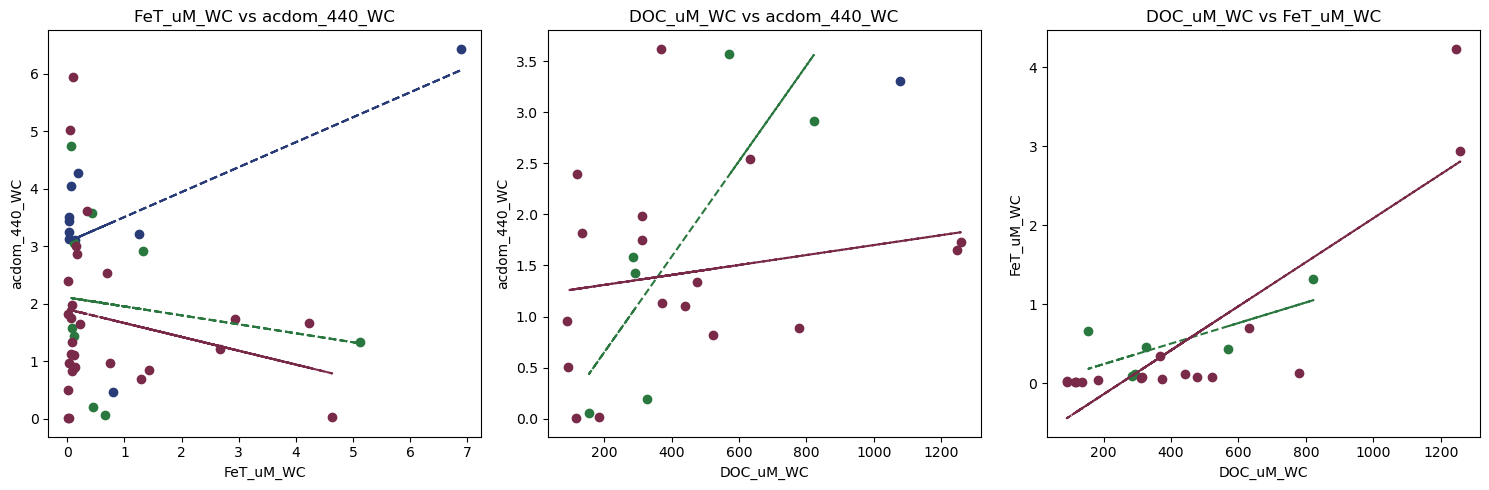

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df = ds_avg[ds_avg['RGN'].isin(['North', 'Central', 'St.Lucie'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

Frames = []

ax = axes[0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['FeT_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['FeT_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"FeT_uM_WC vs acdom_440_WC {region}: {r_squared}")
        dict = {'mes_x':['FeT_uM_WC'],
                'mes_y':['acdom_440_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('FeT_uM_WC')
ax.set_ylabel('acdom_440_WC')
ax.set_title('FeT_uM_WC vs acdom_440_WC')

ax = axes[1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot) 
        print(f"DOC_uM_WC vs acdom_440_WC {region}: {r_squared}")
        dict = {'mes_x':['DOC_uM_WC'],
                'mes_y':['acdom_440_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')


ax.set_xlabel('DOC_uM_WC')
ax.set_ylabel('acdom_440_WC')
ax.set_title('DOC_uM_WC vs acdom_440_WC')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"

ax = axes[2]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['FeT_uM_WC'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['FeT_uM_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"DOC_uM_WC vs FeT_uM_WC {region}: {r_squared}")
        dict = {'mes_x':['DOC_uM_WC'],
                'mes_y':['FeT_uM_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('DOC_uM_WC')
ax.set_ylabel('FeT_uM_WC')
ax.set_title('DOC_uM_WC vs FeT_uM_WC')


# Show the plot
plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_WC.png', format='png', transparent=True)
plt.show()

r2_sums_1 = pd.concat(Frames, axis=0, ignore_index=False)

FeT_uM_WC vs FeT_uM_PW North: 0.4746980826522269
FeT_uM_WC vs FeT_uM_PW Central: 0.2838481973242206
FeT_uM_WC vs FeT_uM_PW St.Lucie: 0.3870641555371499
na
FeT_uM_WC vs FeT_uM_PW Offshore: 0.4359569730202888
acdom_440_WC vs acdom_440_PW North: -inf
acdom_440_WC vs acdom_440_PW Central: 0.1649153117043951
acdom_440_WC vs acdom_440_PW St.Lucie: 0.7418101522070267
na
na
DOC_uM_WC vs DOC_uM_PW North: -inf
DOC_uM_WC vs DOC_uM_PW Central: 0.7364365243741477
DOC_uM_WC vs DOC_uM_PW St.Lucie: 0.8360543468109508
na
na


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\3879654190.py:46: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\3879654190.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\3879654190.py:79: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\3879654190.py:86: RuntimeWarning: divide by zero encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)


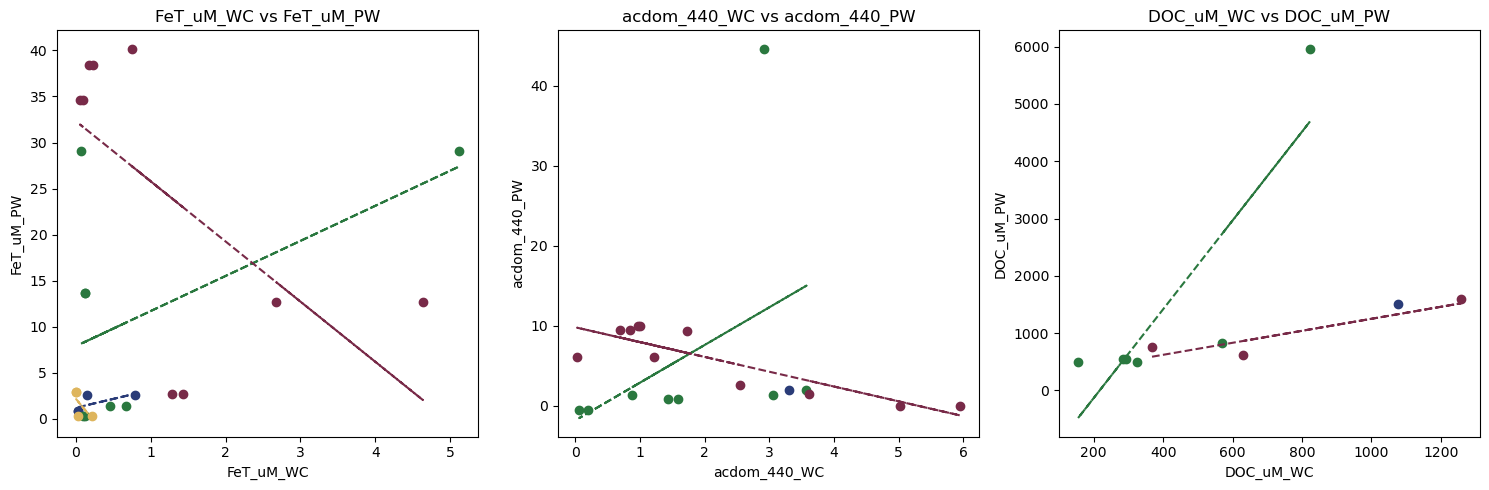

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df = ds_avg[ds_avg['RGN'].isin(['North', 'Central', 'St.Lucie', 'ECA', 'Offshore'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

ax = axes[0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    subset = subset[~subset['FeT_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['FeT_uM_WC'], subset['FeT_uM_PW'], label=region, color=color)
        x = subset['FeT_uM_WC']
        y = subset['FeT_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"FeT_uM_WC vs FeT_uM_PW {region}: {r_squared}")
        dict = {'mes_x':['FeT_uM_WC'],
                'mes_y':['FeT_uM_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('FeT_uM_WC')
ax.set_ylabel('FeT_uM_PW')
ax.set_title('FeT_uM_WC vs FeT_uM_PW')

ax = axes[1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['acdom_440_WC'].isna()]
    subset = subset[~subset['acdom_440_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['acdom_440_WC'], subset['acdom_440_PW'], label=region, color=color)
        x = subset['acdom_440_WC']
        y = subset['acdom_440_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot) 
        print(f"acdom_440_WC vs acdom_440_PW {region}: {r_squared}")
        dict = {'mes_x':['acdom_440_WC'],
                'mes_y':['acdom_440_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')


ax.set_xlabel('acdom_440_WC')
ax.set_ylabel('acdom_440_PW')
ax.set_title('acdom_440_WC vs acdom_440_PW')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"

ax = axes[2]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['DOC_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['DOC_uM_PW'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['DOC_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"DOC_uM_WC vs DOC_uM_PW {region}: {r_squared}")
        dict = {'mes_x':['DOC_uM_WC'],
                'mes_y':['DOC_uM_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('DOC_uM_WC')
ax.set_ylabel('DOC_uM_PW')
ax.set_title('DOC_uM_WC vs DOC_uM_PW')


# Show the plot
plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_WC_vs_PW.png', format='png', transparent=True)
plt.show()

r2_sums_2 = pd.concat(Frames, axis=0, ignore_index=False)

na
FeT_uM_PW vs acdom_440_PW Central: 0.424260119736277
FeT_uM_PW vs acdom_440_PW St.Lucie: 0.08004758086475217
na
na
DOC_uM_PW vs acdom_440_PW North: -inf
DOC_uM_PW vs acdom_440_PW Central: 0.9992246834147014
DOC_uM_PW vs acdom_440_PW St.Lucie: 0.9357832978165443
na
na
na
DOC_uM_PW vs FeT_uM_PW Central: 1.0
na
na
na


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\1122927419.py:46: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\1122927419.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)


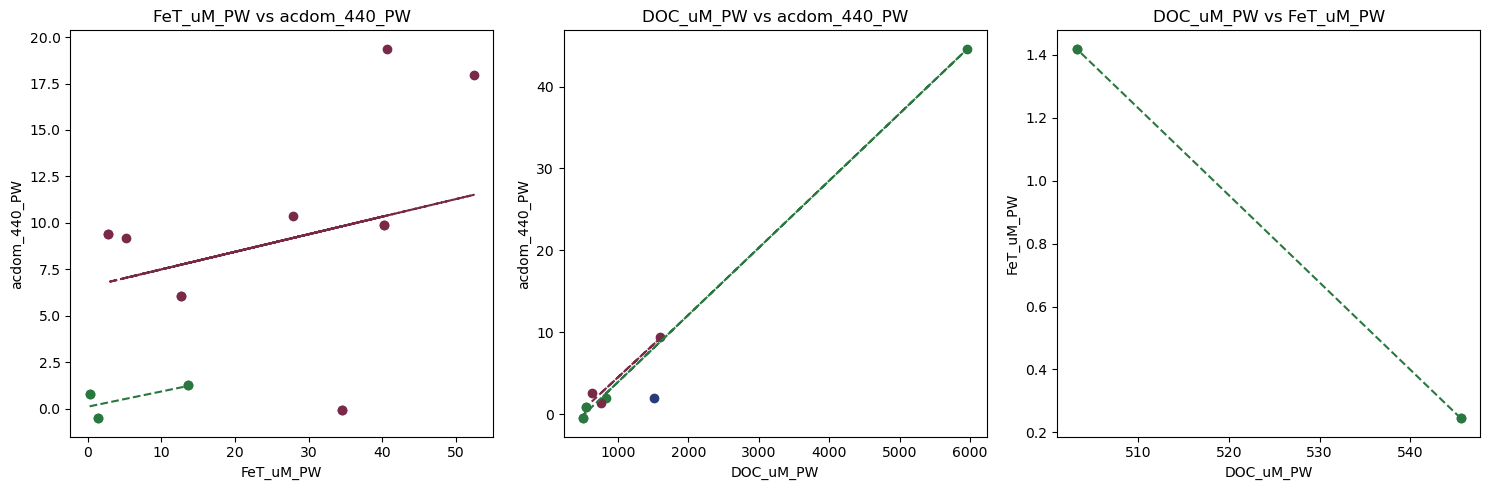

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df = ds_avg[ds_avg['RGN'].isin(['North', 'Central', 'St.Lucie', 'ECA', 'Offshore'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

ax = axes[0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_PW'].isna()]
    subset = subset[~subset['acdom_440_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['FeT_uM_PW'], subset['acdom_440_PW'], label=region, color=color)
        x = subset['FeT_uM_PW']
        y = subset['acdom_440_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"FeT_uM_PW vs acdom_440_PW {region}: {r_squared}")
        dict = {'mes_x':['FeT_uM_PW'],
                'mes_y':['acdom_440_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('FeT_uM_PW')
ax.set_ylabel('acdom_440_PW')
ax.set_title('FeT_uM_PW vs acdom_440_PW')

ax = axes[1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_PW'].isna()]
    subset = subset[~subset['acdom_440_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_PW'], subset['acdom_440_PW'], label=region, color=color)
        x = subset['DOC_uM_PW']
        y = subset['acdom_440_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot) 
        print(f"DOC_uM_PW vs acdom_440_PW {region}: {r_squared}")
        dict = {'mes_x':['DOC_uM_PW'],
                'mes_y':['acdom_440_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('DOC_uM_PW')
ax.set_ylabel('acdom_440_PW')
ax.set_title('DOC_uM_PW vs acdom_440_PW')

ax = axes[2]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_PW'].isna()]
    subset = subset[~subset['DOC_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_PW'], subset['FeT_uM_PW'], label=region, color=color)
        x = subset['DOC_uM_PW']
        y = subset['FeT_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"DOC_uM_PW vs FeT_uM_PW {region}: {r_squared}")
        dict = {'mes_x':['DOC_uM_PW'],
                'mes_y':['FeT_uM_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('DOC_uM_PW')
ax.set_ylabel('FeT_uM_PW')
ax.set_title('DOC_uM_PW vs FeT_uM_PW')

# Show the plot
plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_PW.png', format='png', transparent=True)
plt.show()

r2_sums_3 = pd.concat(Frames, axis=0, ignore_index=False)

TC vs FeT_uM_PW North: 1.0
TC vs FeT_uM_PW Central: 1.0
TC vs FeT_uM_PW St.Lucie: 0.056736327131394204
na
TC vs FeT_uM_PW Offshore: 1.0
na
TC vs acdom_440_PW Central: -inf
TC vs acdom_440_PW St.Lucie: 0.334998287905672
na
na
OS vs FeT_uM_PW North: nan
OS vs FeT_uM_PW Central: -inf
OS vs FeT_uM_PW St.Lucie: 0.8798241098341008
na
na
na
na
OS vs acdom_440_PW St.Lucie: 0.11627548090425499
na
na


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\1083098111.py:46: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\1083098111.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\1083098111.py:77: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\1083098111.py:84: RuntimeWarning: invalid value encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\1083098111.py:77: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\1083098111.py:84: RuntimeWarning: divide by zero encountered in scalar divide
  r_squared = 1 - (ss_res / ss_tot)


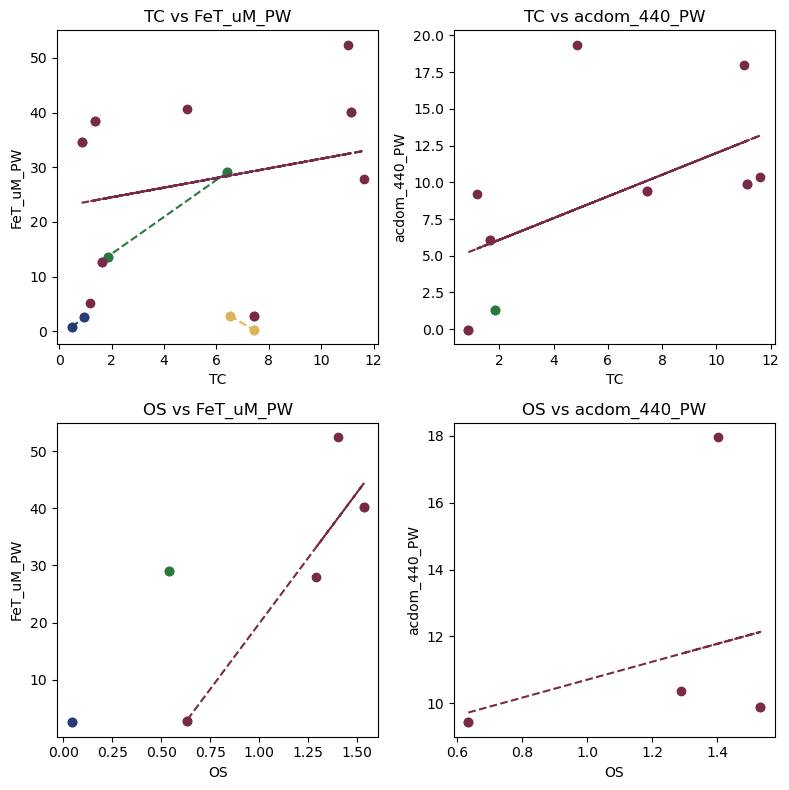

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

df = ds_avg[ds_avg['RGN'].isin(['North', 'Central', 'St.Lucie', 'ECA', 'Offshore'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

ax = axes[0,0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['TC'].isna()]
    subset = subset[~subset['FeT_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['TC'], subset['FeT_uM_PW'], label=region, color=color)
        x = subset['TC']
        y = subset['FeT_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"TC vs FeT_uM_PW {region}: {r_squared}")
        dict = {'mes_x':['TC'],
                'mes_y':['FeT_uM_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('TC')
ax.set_ylabel('FeT_uM_PW')
ax.set_title('TC vs FeT_uM_PW')

ax = axes[0,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['TC'].isna()]
    subset = subset[~subset['acdom_440_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['TC'], subset['acdom_440_PW'], label=region, color=color)
        x = subset['TC']
        y = subset['acdom_440_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"TC vs acdom_440_PW {region}: {r_squared}")
        dict = {'mes_x':['TC'],
                'mes_y':['acdom_440_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('TC')
ax.set_ylabel('acdom_440_PW')
ax.set_title('TC vs acdom_440_PW')

ax = axes[1,0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['OS'].isna()]
    subset = subset[~subset['FeT_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['OS'], subset['FeT_uM_PW'], label=region, color=color)
        x = subset['OS']
        y = subset['FeT_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"OS vs FeT_uM_PW {region}: {r_squared}")
        dict = {'mes_x':['OS'],
                'mes_y':['FeT_uM_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('OS')
ax.set_ylabel('FeT_uM_PW')
ax.set_title('OS vs FeT_uM_PW')

ax = axes[1,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['OS'].isna()]
    subset = subset[~subset['acdom_440_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['OS'], subset['acdom_440_PW'], label=region, color=color)
        x = subset['OS']
        y = subset['acdom_440_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"OS vs acdom_440_PW {region}: {r_squared}")
        dict = {'mes_x':['OS'],
                'mes_y':['acdom_440_PW'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('OS')
ax.set_ylabel('acdom_440_PW')
ax.set_title('OS vs acdom_440_PW')

# Show the plot
plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_Elemntal_PW.png', format='png', transparent=True)
plt.show()

r2_sums_4 = pd.concat(Frames, axis=0, ignore_index=False)

TC vs FeT_uM_WC North: 0.4746980826522268
TC vs FeT_uM_WC Central: 0.32455088455610326
TC vs FeT_uM_WC St.Lucie: 0.0007525307473791321
na
TC vs FeT_uM_WC Offshore: 0.4359569730202888
TC vs acdom_440_WC North: 0.41971116608450365
TC vs acdom_440_WC Central: 0.12201965548160176
TC vs acdom_440_WC St.Lucie: 0.2675538273707484
na
na
OS vs FeT_uM_WC North: 0.0
OS vs FeT_uM_WC Central: 1.1102230246251565e-16
OS vs FeT_uM_WC St.Lucie: 0.9611255180804883
na
na
OS vs acdom_440_WC North: 0.0
OS vs acdom_440_WC Central: 0.0
OS vs acdom_440_WC St.Lucie: 0.8029063561432409
na
na


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\4263047628.py:77: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\4263047628.py:77: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\4263047628.py:108: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_22948\4263047628.py:108: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 1, rcond=None)


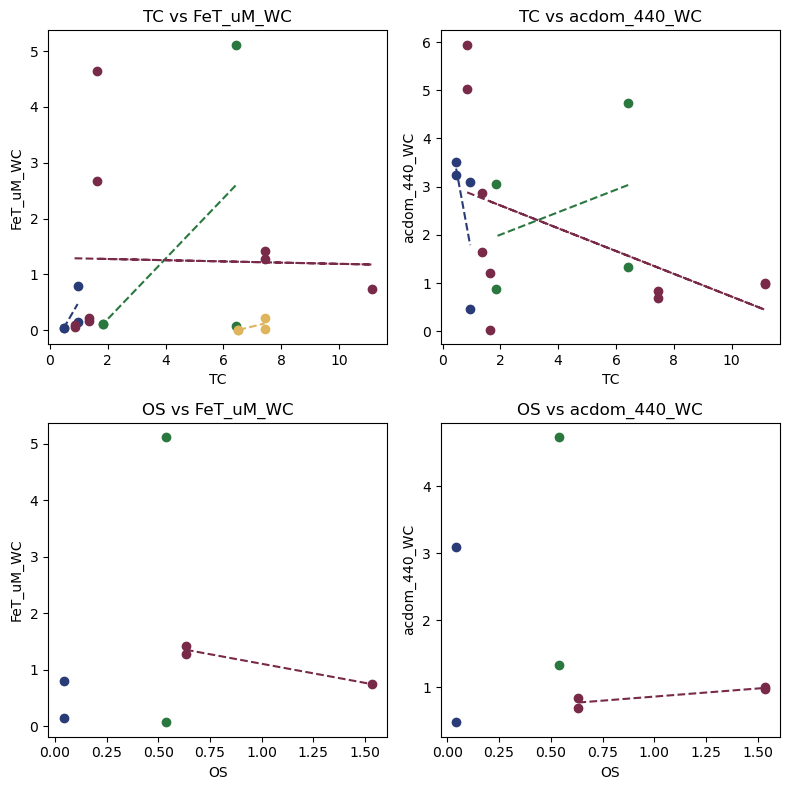

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

df = ds_avg[ds_avg['RGN'].isin(['North', 'Central', 'St.Lucie', 'ECA', 'Offshore'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

ax = axes[0,0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['TC'].isna()]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['TC'], subset['FeT_uM_WC'], label=region, color=color)
        x = subset['TC']
        y = subset['FeT_uM_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"TC vs FeT_uM_WC {region}: {r_squared}")
        dict = {'mes_x':['TC'],
                'mes_y':['FeT_uM_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('TC')
ax.set_ylabel('FeT_uM_WC')
ax.set_title('TC vs FeT_uM_WC')

ax = axes[0,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['TC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['TC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['TC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"TC vs acdom_440_WC {region}: {r_squared}")
        dict = {'mes_x':['TC'],
                'mes_y':['acdom_440_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('TC')
ax.set_ylabel('acdom_440_WC')
ax.set_title('TC vs acdom_440_WC')

ax = axes[1,0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['OS'].isna()]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['OS'], subset['FeT_uM_WC'], label=region, color=color)
        x = subset['OS']
        y = subset['FeT_uM_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"OS vs FeT_uM_WC {region}: {r_squared}")
        dict = {'mes_x':['OS'],
                'mes_y':['FeT_uM_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('OS')
ax.set_ylabel('FeT_uM_WC')
ax.set_title('OS vs FeT_uM_WC')

ax = axes[1,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['OS'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['OS'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['OS']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"OS vs acdom_440_WC {region}: {r_squared}")
        dict = {'mes_x':['OS'],
                'mes_y':['acdom_440_WC'],
                'region':[region],
                'r_squared':[r_squared]}
        r2_sums = pd.DataFrame(dict)
        Frames.append(r2_sums)
    else: 
        print('na')

ax.set_xlabel('OS')
ax.set_ylabel('acdom_440_WC')
ax.set_title('OS vs acdom_440_WC')

# Show the plot
plt.tight_layout()

fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_Elemntal_WC.png', format='png', transparent=True)
plt.show()

r2_sums_5 = pd.concat(Frames, axis=0, ignore_index=False)

In [23]:
r2_sums_5
r2_sum = r2_sums_5[r2_sums_5['r_squared'] > 0]
r2_sum = r2_sum[r2_sum['r_squared'] < 1]
r2_sum = r2_sum.sort_values(by=['region', 'r_squared'], ascending=[False, False])

r2_sum

,mes_x,mes_y,region,r_squared
0,OS,FeT_uM_WC,St.Lucie,9.611255e-01
0,DOC_uM_PW,acdom_440_PW,St.Lucie,9.357833e-01
0,OS,FeT_uM_PW,St.Lucie,8.798241e-01
0,DOC_uM_WC,DOC_uM_PW,St.Lucie,8.360543e-01
0,OS,acdom_440_WC,St.Lucie,8.029064e-01
0,acdom_440_WC,acdom_440_PW,St.Lucie,7.418102e-01
0,DOC_uM_WC,FeT_uM_WC,St.Lucie,7.327064e-01
0,FeT_uM_WC,FeT_uM_PW,St.Lucie,3.870642e-01
0,TC,acdom_440_PW,St.Lucie,3.349983e-01
0,TC,acdom_440_WC,St.Lucie,2.675538e-01


In [24]:
r2_sum_top = r2_sum[r2_sum['r_squared'] > .4]
r2_sum_top

,mes_x,mes_y,region,r_squared
0,OS,FeT_uM_WC,St.Lucie,0.961126
0,DOC_uM_PW,acdom_440_PW,St.Lucie,0.935783
0,OS,FeT_uM_PW,St.Lucie,0.879824
0,DOC_uM_WC,DOC_uM_PW,St.Lucie,0.836054
0,OS,acdom_440_WC,St.Lucie,0.802906
0,acdom_440_WC,acdom_440_PW,St.Lucie,0.741810
0,DOC_uM_WC,FeT_uM_WC,St.Lucie,0.732706
0,FeT_uM_WC,FeT_uM_PW,Offshore,0.435957
0,TC,FeT_uM_WC,Offshore,0.435957
0,FeT_uM_WC,FeT_uM_PW,North,0.474698


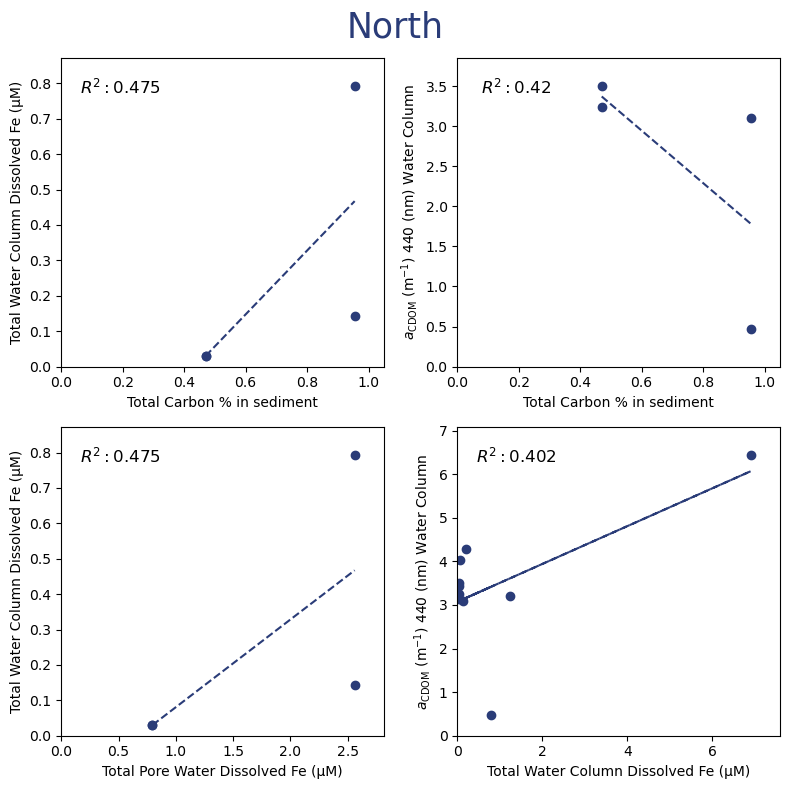

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

df = ds_avg[ds_avg['RGN'].isin(['North'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

ax = axes[0,0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['TC'].isna()]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['TC'], subset['FeT_uM_WC'], label=region, color=color)
        x = subset['TC']
        y = subset['FeT_uM_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Carbon % in sediment')
ax.set_ylabel(f'Total Water Column Dissolved Fe (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[0,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['TC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['TC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['TC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Carbon % in sediment')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[1,0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_PW'].isna()]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['FeT_uM_PW'], subset['FeT_uM_WC'], label=region, color=color)
        x = subset['FeT_uM_PW']
        y = subset['FeT_uM_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Pore Water Dissolved Fe (µM)')
ax.set_ylabel(f'Total Water Column Dissolved Fe (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[1,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['FeT_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['FeT_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column Dissolved Fe (µM)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)

# Show the plot
fig.suptitle('North', fontsize = 25, color = '#2a3c78')
plt.tight_layout()


fig.patch.set_facecolor('none')
fig.patch.set_alpha(0.0)

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_NORTH.png', format='png', transparent=True)
plt.show()

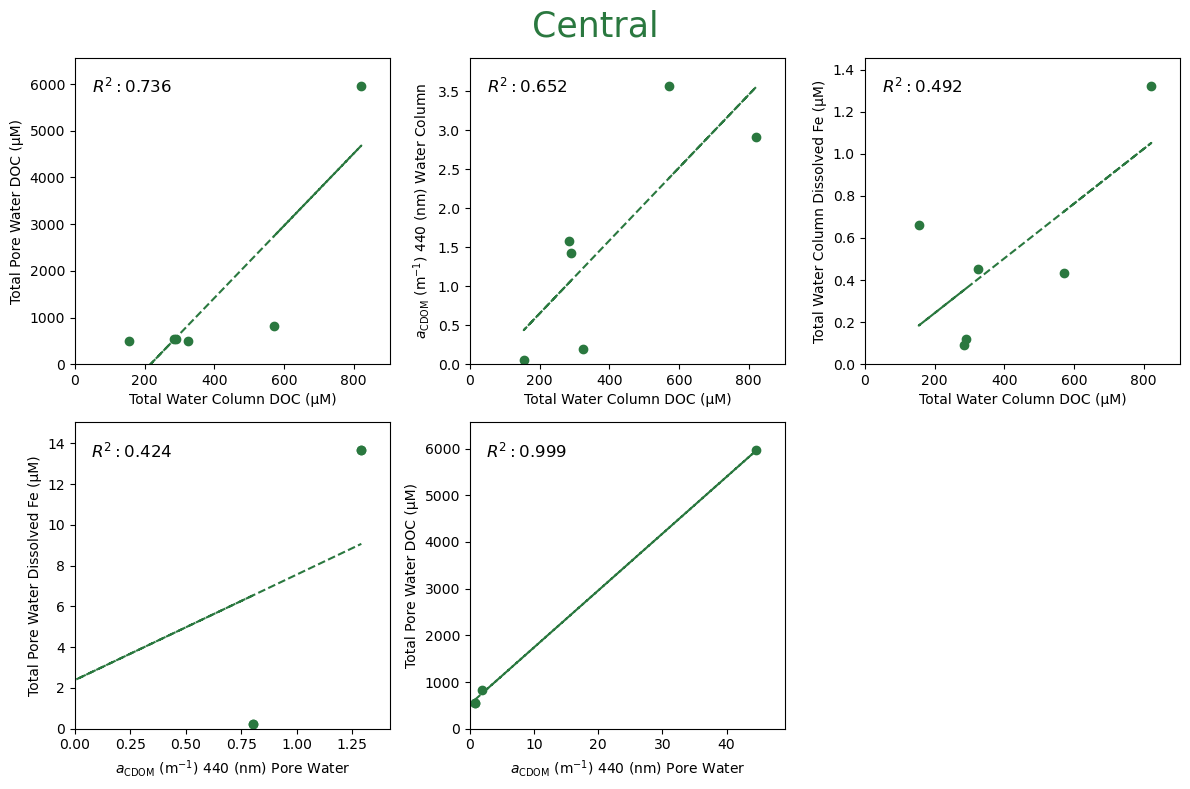

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

df = ds_avg[ds_avg['RGN'].isin(['Central'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

ax = axes[0,0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['DOC_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['DOC_uM_PW'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['DOC_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column DOC (µM)')
ax.set_ylabel(f'Total Pore Water DOC (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[0,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column DOC (µM)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)

ax = axes[0,2]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['FeT_uM_WC'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['FeT_uM_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column DOC (µM)')
ax.set_ylabel(f'Total Water Column Dissolved Fe (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[1,0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['acdom_440_PW'].isna()]
    subset = subset[~subset['FeT_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['acdom_440_PW'], subset['FeT_uM_PW'], label=region, color=color)
        x = subset['acdom_440_PW']
        y = subset['FeT_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Pore Water')
ax.set_ylabel(f'Total Pore Water Dissolved Fe (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[1,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['acdom_440_PW'].isna()]
    subset = subset[~subset['DOC_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['acdom_440_PW'], subset['DOC_uM_PW'], label=region, color=color)
        x = subset['acdom_440_PW']
        y = subset['DOC_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Pore Water')
ax.set_ylabel(f'Total Pore Water DOC (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)

fig.delaxes(axes[1,2])

# Show the plot
fig.suptitle('Central', fontsize = 25, color = '#2a783f')
plt.tight_layout()


fig.patch.set_facecolor('white')

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_CENTRAL.png', format='png')
plt.show()

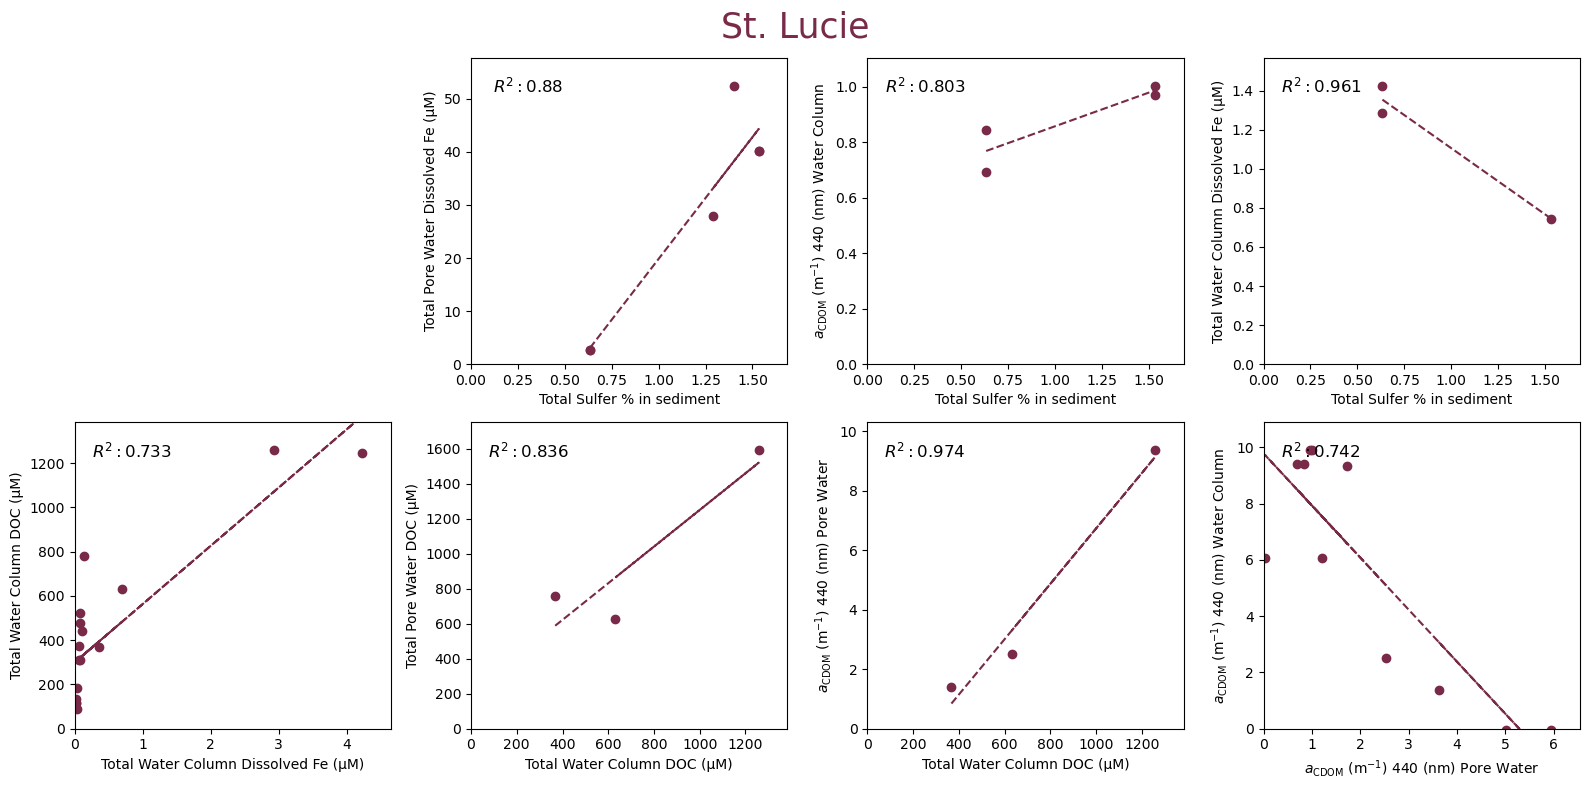

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

df = ds_avg[ds_avg['RGN'].isin(['St.Lucie'])]
colors = { 'St.Lucie': '#782a48'}

ax = axes[0,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['OS'].isna()]
    subset = subset[~subset['FeT_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['OS'], subset['FeT_uM_PW'], label=region, color=color)
        x = subset['OS']
        y = subset['FeT_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Sulfer % in sediment')
ax.set_ylabel(f'Total Pore Water Dissolved Fe (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[0,2]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['OS'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['OS'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['OS']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Sulfer % in sediment')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)

ax = axes[0,3]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['OS'].isna()]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['OS'], subset['FeT_uM_WC'], label=region, color=color)
        x = subset['OS']
        y = subset['FeT_uM_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Sulfer % in sediment')
ax.set_ylabel(f'Total Water Column Dissolved Fe (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[1,2]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['acdom_440_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['acdom_440_PW'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['acdom_440_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column DOC (µM)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Pore Water')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[1,1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['DOC_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['DOC_uM_PW'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['DOC_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel( f'Total Water Column DOC (µM)')
ax.set_ylabel(f'Total Pore Water DOC (µM)' )
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)

ax = axes[1,0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['FeT_uM_WC'], subset['DOC_uM_WC'], label=region, color=color)
        x = subset['FeT_uM_WC']
        y = subset['DOC_uM_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column Dissolved Fe (µM)')
ax.set_ylabel(f'Total Water Column DOC (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)

ax = axes[1,3]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['acdom_440_WC'].isna()]
    subset = subset[~subset['acdom_440_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['acdom_440_WC'], subset['acdom_440_PW'], label=region, color=color)
        x = subset['acdom_440_WC']
        y = subset['acdom_440_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Pore Water')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column ')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)

fig.delaxes(axes[0,0])

# Show the plot
fig.suptitle('St. Lucie', fontsize = 25, color = '#782a48')
plt.tight_layout()

fig.patch.set_facecolor('white')

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_ST.LUCIE.png', format='png')
plt.show()

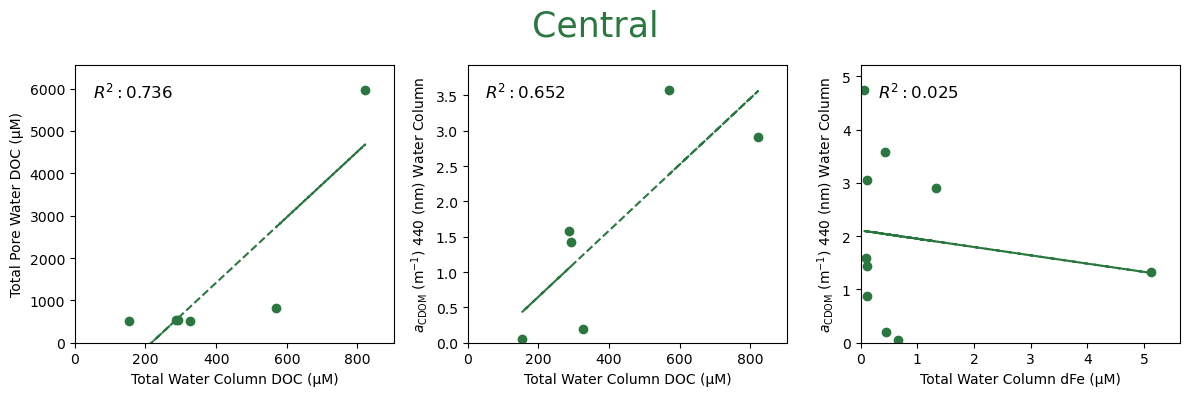

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

df = ds_avg[ds_avg['RGN'].isin(['Central'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

ax = axes[0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['DOC_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['DOC_uM_PW'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['DOC_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column DOC (µM)')
ax.set_ylabel(f'Total Pore Water DOC (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column DOC (µM)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)

ax = axes[2]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['acdom_440_WC'].isna()]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['FeT_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['FeT_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column dFe (µM)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


# Show the plot
fig.suptitle('Central', fontsize = 25, color = '#2a783f')
plt.tight_layout()


fig.patch.set_facecolor('white')

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_CENTRAL.png', format='png')
plt.show()

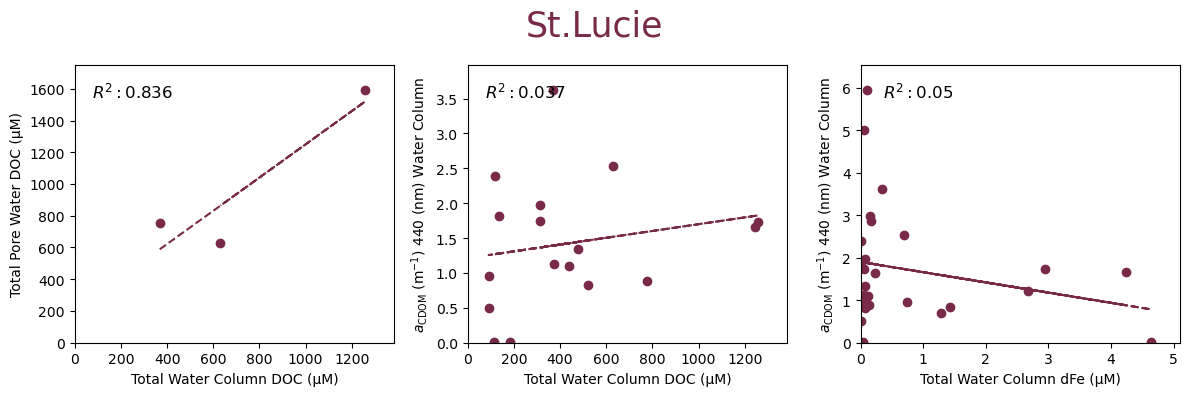

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

df = ds_avg[ds_avg['RGN'].isin(['St.Lucie'])]
colors = {'North': '#2a3c78', 'Central': '#2a783f', 'St.Lucie': '#782a48', 'ECA': '#DED65D', 'Offshore': '#DEB55D'}

ax = axes[0]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['DOC_uM_PW'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['DOC_uM_PW'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['DOC_uM_PW']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column DOC (µM)')
ax.set_ylabel(f'Total Pore Water DOC (µM)')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


ax = axes[1]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['DOC_uM_WC'].isna()]
    subset = subset[~subset['acdom_440_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['DOC_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['DOC_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column DOC (µM)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)

ax = axes[2]
for region, color in colors.items():
    subset = df[df['RGN'] == region]
    subset = subset[~subset['acdom_440_WC'].isna()]
    subset = subset[~subset['FeT_uM_WC'].isna()]
    if not subset.empty:
        ax.scatter(subset['FeT_uM_WC'], subset['acdom_440_WC'], label=region, color=color)
        x = subset['FeT_uM_WC']
        y = subset['acdom_440_WC']
        coefficients = np.polyfit(x, y, 1, rcond=None)
        slope = coefficients[0]
        line = np.poly1d(coefficients)
        ax.plot(x, line(x), color=color, linestyle='--', label=f'{region} Fit')
        residuals = y - line(x)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
        rounded_r_squared = round(r_squared, 3)
        formatted_text = f"$R^2: {rounded_r_squared}$"
        ax.text(max(x)*.2, max(y), formatted_text, fontsize=12, ha='center', va='center')

ax.set_xlabel(f'Total Water Column dFe (µM)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm) Water Column')
ax.set_ylim(0,max(y)*1.1)
ax.set_xlim(0,max(x)*1.1)


# Show the plot
fig.suptitle('St.Lucie', fontsize = 25, color = '#782a48')
plt.tight_layout()


fig.patch.set_facecolor('white')

plt.savefig('../Fellowships/IRL_GRF/IRL_2023/Plots/Scatter_CENTRAL.png', format='png')
plt.show()

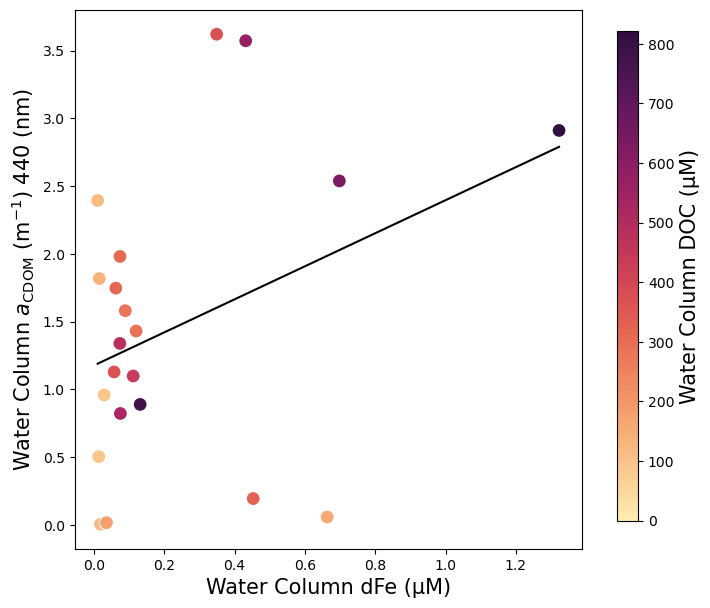

In [30]:
df = ds_avg[ds_avg['RGN'].isin(['St.Lucie', 'Central'])]


x_var = 'FeT_uM_WC'
y_var = 'acdom_440_WC'
c_var = 'DOC_uM_WC'

x_labl = f'Water Column dFe (µM)'
y_labl = r'Water Column $a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm)' 
c_labl = f'Water Column DOC (µM)'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
#sub = sub[(sub['RGN'] == 'St.Lucie') | (sub['RGN'] == 'North')]
#sub = sub[sub['DOC_uM_WC'] < 2]
data = sub[[x_var, y_var, c_var]]
data = data[pd.notna(data[c_var])]
data = data[data[c_var] < 1000]
#data = data[pd.notna(data['OCmol_5cm_deepM3'])]
colors = data[c_var].astype(float)

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

vmin = 0
vmax = data[c_var].max()

sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=cmo.matter, s = 100, vmin=vmin, vmax=vmax, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace(x_var, x_labl), size=15)
axes.set_ylabel(y_var.replace(y_var, y_labl), size=15)

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.matter, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel(c_labl, size = 15)

# Adjust layout
#plt.tight_layout()

# Show the plot
plt.show()

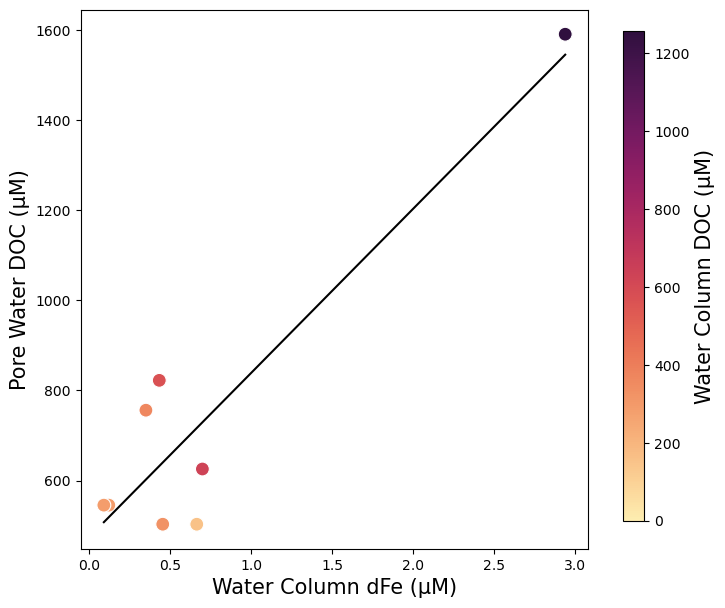

In [31]:
df = ds_avg[ds_avg['RGN'].isin(['St.Lucie', 'Central'])]

x_var = 'FeT_uM_WC'
y_var = 'DOC_uM_PW'
c_var = 'DOC_uM_WC'

x_labl = f'Water Column dFe (µM)'
y_labl = r'Pore Water DOC (µM)' 
c_labl = f'Water Column DOC (µM)'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
#sub = sub[(sub['RGN'] == 'St.Lucie') | (sub['RGN'] == 'North')]
#sub = sub[sub['DOC_uM_WC'] < 2]
data = sub[[x_var, y_var, c_var]]
data = data[pd.notna(data[c_var])]
data = data[data[y_var] < 5000]
#data = data[pd.notna(data['OCmol_5cm_deepM3'])]
colors = data[c_var].astype(float)

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

vmin = 0
vmax = data[c_var].max()

sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=cmo.matter, s = 100, vmin=vmin, vmax=vmax, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace(x_var, x_labl), size=15)
axes.set_ylabel(y_var.replace(y_var, y_labl), size=15)

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.matter, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel(c_labl, size = 15)

# Adjust layout
#plt.tight_layout()

# Show the plot
plt.show()

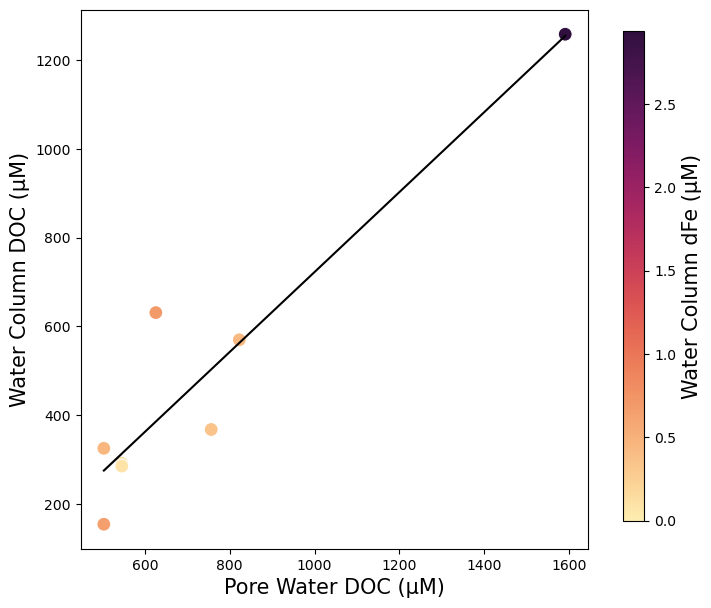

In [32]:
df = ds_avg[ds_avg['RGN'].isin(['St.Lucie', 'Central'])]

y_var = 'DOC_uM_WC'
x_var = 'DOC_uM_PW'
c_var = 'FeT_uM_WC'

y_labl = f'Water Column DOC (µM)'
x_labl = f'Pore Water DOC (µM)'
c_labl = r'Water Column dFe (µM)' 

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
#sub = sub[(sub['RGN'] == 'St.Lucie') | (sub['RGN'] == 'North')]
#sub = sub[sub['DOC_uM_WC'] < 2]
data = sub[[x_var, y_var, c_var]]
data = data[pd.notna(data[c_var])]
data = data[data[x_var] < 5000]
#data = data[pd.notna(data['OCmol_5cm_deepM3'])]
colors = data[c_var].astype(float)

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

vmin = 0
vmax = data[c_var].max()

sns.scatterplot(x=x_var, y=y_var, c=colors, cmap=cmo.matter, s = 100, vmin=vmin, vmax=vmax, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace(x_var, x_labl), size=15)
axes.set_ylabel(y_var.replace(y_var, y_labl), size=15)

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.matter, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel(c_labl, size = 15)

# Adjust layout
#plt.tight_layout()

# Show the plot
plt.show()

In [33]:
sub

,RGN,STN,YearMonth,DEPTH,FeT_uM_WC,acdom_440_WC,DOC_uM_WC,FeT_uM_PW,acdom_440_PW,DOC_uM_PW,OS,TC
0,Central,B_point,2022-06,B,0.120128,1.430193,291.708333,0.245085,0.801597,545.547579,NaN,NaN
1,Central,B_point,2022-06,S,0.089385,1.580384,285.625000,0.245085,0.801597,545.547579,NaN,NaN
2,Central,S_beach,2022-05,B,0.663319,0.058024,154.708333,1.419038,-0.515319,503.198583,NaN,NaN
3,Central,S_beach,2022-05,S,0.453166,0.194146,325.625000,1.419038,-0.515319,503.198583,NaN,NaN
4,Central,TC,2022-11,S,1.322752,2.910127,821.833333,NaN,44.622098,5961.562500,NaN,NaN
7,Central,VB,2022-11,S,0.431822,3.571856,569.958333,NaN,1.955034,822.500000,NaN,NaN
65,St.Lucie,JB,2022-11,S,0.349242,3.620100,368.000000,NaN,1.391823,756.250000,NaN,NaN
79,St.Lucie,SF,2022-11,S,2.939123,1.732951,1257.916667,NaN,9.357932,1590.625000,NaN,NaN
88,St.Lucie,SLE,2022-11,S,0.698067,2.537821,631.125000,NaN,2.519969,625.750000,NaN,NaN


C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  scout = method(scout_x, scout_y, **kws)
C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


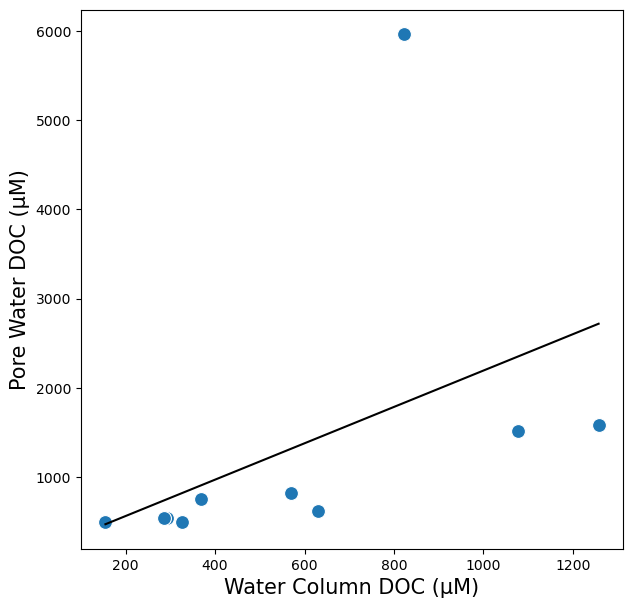

In [34]:
df = ds_avg

y_var = 'DOC_uM_PW'
x_var = 'DOC_uM_WC'
c_var = 'YearMonth'

y_labl = f'Pore Water DOC (µM)'
#c_labl = r'Pore Water $a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm)' 
x_labl = f'Water Column DOC (µM)'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
#sub = sub[(sub['RGN'] == 'St.Lucie') | (sub['RGN'] == 'North')]
#sub = sub[sub['DOC_uM_WC'] < 2]
data = sub[[x_var, y_var, c_var]]
data = data[pd.notna(data[c_var])]
#data = data[data[c_var] < 1000]
#data = data[pd.notna(data['OCmol_5cm_deepM3'])]
#colors = data[c_var].astype(float)

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

vmin = 0
vmax = data[c_var].max()

sns.scatterplot(x=x_var, y=y_var, s = 100, vmin=vmin, vmax=vmax, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace(x_var, x_labl), size=15)
axes.set_ylabel(y_var.replace(y_var, y_labl), size=15)

# Add a color bar for the depth on the right side of the figure
#fig.subplots_adjust(right=0.85)
#cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
#cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.matter, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
#cbar.ax.set_ylabel(c_labl, size = 15)

# Adjust layout
#plt.tight_layout()

# Show the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:           acdom_440_WC   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                   0.01595
Date:                Thu, 18 Apr 2024   Prob (F-statistic):              0.984
Time:                        14:36:18   Log-Likelihood:                -104.28
No. Observations:                  51   AIC:                             214.6
Df Residuals:                      48   BIC:                             220.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7537      0.397      4.412      0.0

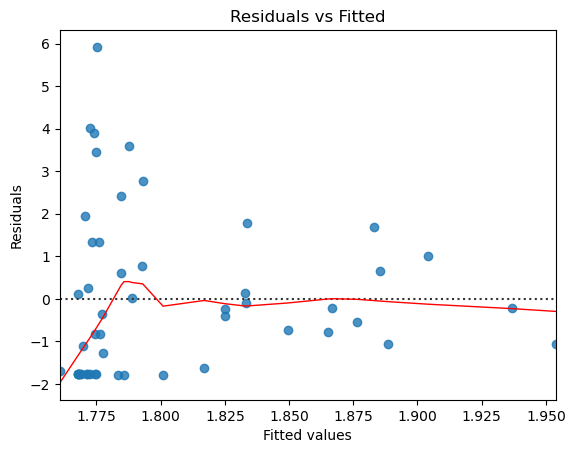

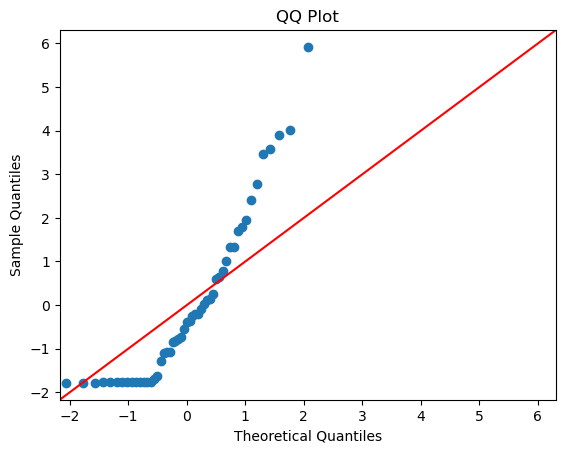

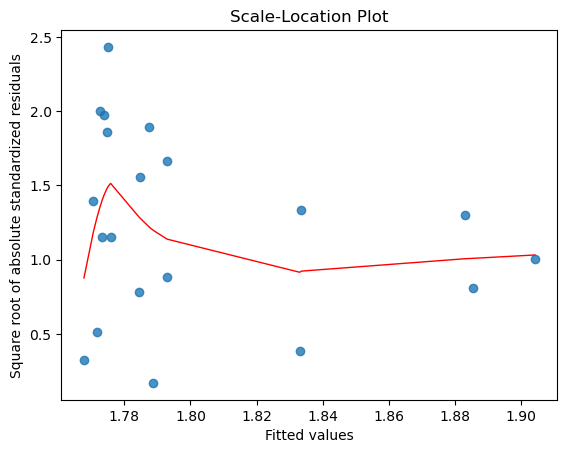

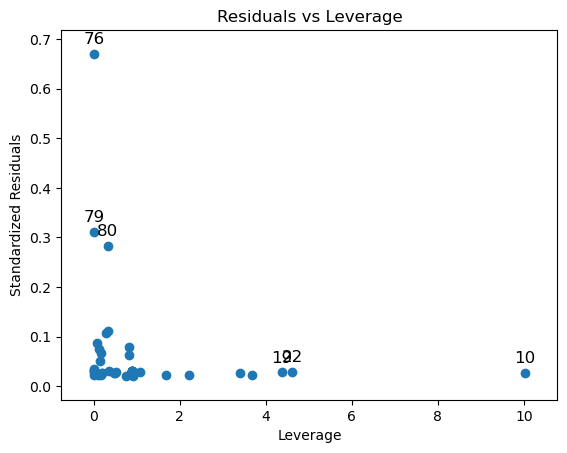

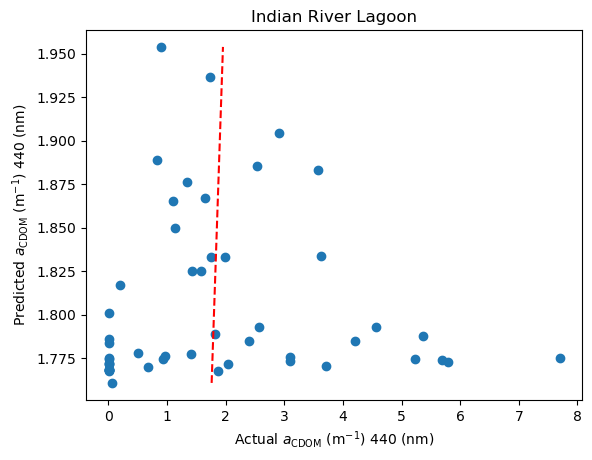

In [35]:
formula = 'acdom_440_WC ~ DOC_uM_WC + FeT_uM_WC'


# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df)

# Insert predictions back to dataframe
df['acdom_440_WC_pred'] = predicted

# Plot
plt.scatter(df['acdom_440_WC'], predicted)
plt.xlabel(r'Actual $a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm)')
plt.ylabel('Predicted $a_{\mathrm{CDOM}}$ (m$^{-1}$) 440 (nm)')
plt.title('Indian River Lagoon')
plt.plot([df['acdom_440_WC_pred'].min(), df['acdom_440_WC_pred'].max()], 
         [df['acdom_440_WC_pred'].min(), df['acdom_440_WC_pred'].max()], 'r--')
plt.show()
